# Introduction to Data Distributions with Scipy Module

## What's Covered
1. Understanding the Role of a Data Analyst
2. What is a Data Distribution?
3. Key characteristics of a Data Distributions
4. Types of Distributions
5. Why Study Data Distributions?
6. Importing Libraries and Creating Helper Functions
7. Discrete Distribution
- Bernoulli Distribution
- Binomial Distribution
- Poisson Distribution
- Multinomial Distribution
- Conclusion
8. Continuous Distribution
- Uniform Distribution
- Gaussian (Normal) Distribution and 68-95-99.7% Rule
- Exponential Distribution
- Log Normal Distribution
- Pareto (Power Law) Distribution
- Conclusion
9. Case Study
- Scenario: Setting Up a Garment Store
- Import the Libraries and Load the Data
- Domain Knowledge
- Task to Solve
10. Verify the Type of Distribution - QQ Plot
11. Feature Engineering
- Feature Scaling (Rescaling)
- - Min-Max Scaling (Normalization)
- - z-transformation (Standardization)
- Data Transformation
- - Log Transformation
- - Box Cox Transformation

## Understanding the Role of a Data Analyst
1. No matter in what format the data comes (for eg: .csv, .xlsx, MySQL, PostgreSQL, MongoDB, Oracle, .JSON, .XML, .TXT, .JPG, .PNG, Google Sheet, AWS Server, GCP Server, Azure, etc..) you should be able to EXTRACT the data and LOAD in the tool which you are most comfortable with.
2. You should be able to perform TRANSFORMATION of data so that it is ready for analysis.
3. You should be able to perform DATA ANALYSIS using the skillset which you are most comfortable with.
4. You as a DATA ANALYST should be able to generate ACTIONABLE INSIGHTS from the given data so that the client/businesses can take a DATA DRIVEN DECISION.

### What is a Data Distribution?
A data distribution refers to the way in which data values are spread or distributed across a dataset. It provides information about the possible values a variable can take and how frequently each value occurs. Understanding the distribution of data is fundamental in statistics and data analysis, as it forms the basis for making inferences, building models, and drawing conclusions about a population based on a sample.

### Key characteristics of a Data Distributions
1. Cardinality(nunique) and Unique (For Discrete Columns)
2. Count, Min and Max (For Numerical Columns)
3. Central Tendency: This indicates the "center" of the data. Common measures of central tendency include the mean (average), median (middle value), and mode (most frequently occurring value).
4. Dispersion or Spread: This describes how spread out the data points are. Measures of dispersion include range, variance, and standard deviation.
5. Shape: This refers to the overall pattern or form of the distribution. Common shapes include normal (bell-shaped), skewed (lopsided), and uniform (evenly distributed).

### Types of Distributions

There are two broad categories of Data Distributions:

1. Discrete Distribution (Categorical or Discrete Numerical Columns)
2. Continuous Distribution (Continuos/Real Numerical Feature)
Based on key characteristics of data distribution, we can further classify them into following types:

1. Discrete Distribution (Categorical or Discrete Numerical Columns)
- Bernoulli Distribution
- Binomial Distribution
- Poisson Distribution
- Multinomial Distribution
2. Continuous Distribution (Continuos/Real Numerical Feature)
- Uniform Distribution
- Gaussian (Normal) Distribution
- Exponential Distribution
- Log Normal Distribution
- Pareto (Power Law) Distribution
We will learn the PMFs and PDFs for the above mentioned distributions. The main distinction between PMFs and PDFs is that PMFs give probabilities associated with specific points, while PDFs describe probabilities over intervals.

### Why Study Data Distributions?

Understanding the distribution of data is crucial in a wide range of fields, including statistics, data science, economics, finance, healthcare, and more. It informs decision-making, helps in selecting appropriate statistical tests or models, and provides insights into the underlying patterns and characteristics of a dataset. Following are the benefits of studying data distributions:

1. Outlier and Missing Values - Outliers are data points that are significantly different from the rest of the data. Knowledge of Data Distribution helps perform a better outlier and missing value treatment.
2. Advance Data Analysis - Knowledge of data distributions and their PMFs/PDFs can help us with better insight generation from the given data and take data driven decisions.
3. Inferential Statistics - Knowledge of Distribution can help us select the appropriate Statistical Tests.
4. ML and DL - It also helps us identify appropriate Algorithms for Data Modelling in ML and DL.

Importing Libraries and Creating Helper Functions

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy import stats

In [2]:
# Creating the helper functions for non visual analysis
def discrete_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of discrete data (categorical and numerical).
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'nunique', 'unique']))
    print('Value Counts: \n', series.value_counts())
    print()


def continuous_non_viz_analysis(data):
    '''
    This function performs a complete statistical 
    analysis of continuous numerical data.
    '''
    series = pd.Series(data)
    print(series.agg(['count', 'min', 'max', 'mean', 'median', 'var', 'std', 'skew', 'kurt']).round(2))
    print()

In [3]:
# Creating the helper functions for visual analysis
def discrete_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of discrete data (categorical and numerical).
    '''
    fig, ax = plt.subplots(figsize=(5, 3), constrained_layout=True)
    fig.suptitle("Discrete Distribution Plot")
    
    ax.set_title("Count Plot")
    sns.countplot(x=data, ax=ax)
    
    plt.xticks(rotation=45)
    plt.show()



def continuous_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of continuous numerical data.
    '''

    fig, axes = plt.subplots(1, 3, figsize=(8, 3), constrained_layout=True)
    fig.suptitle("Continuous Distribution Plot")
    
    axes[0].set_title("Histogram Plot")
    sns.histplot(data, ax=axes[0])
    
    axes[1].set_title("KDE Plot")
    sns.kdeplot(data, fill=True, ax=axes[1])

    axes[2].set_title("Box Plot")
    sns.boxplot(data, ax=axes[2])

    plt.show()

#### Discrete Distributions

Bernoulli Distribution
The Bernoulli distribution models a random experiment with two possible outcomes, often labeled as "success" and "failure." It is characterized by a single parameter, p, which represents the probability of success.
For eg:

- Loan Approval - Suppose a bank is considering a loan application. The outcome can be either "Approved" (success) or "Rejected" (failure) based on certain criteria. Let's say the probability of loan approval (p) is 0.8.
> What will be the probabilily of rejection?
  Ans: ___________

- Student Pass/Fail Outcome in a final exam - Suppose a university is considering a pass/fail criterion for a final exam. The outcome for each student can be either "Pass" (success) or "Fail" (failure) based on a predefined threshold. Probability of a student passing the exam is 0.7 (p).
> What is the probability of student failing the   exam?
 Ans: ___________

If data follows bernoulli distribution, we represent it like this:
 x ~ B(1,p)
Probability Mass Function
 f(x)={ p if x=1, 1-p if x=0}
 

In [4]:
def bernoulli_distribution(p,size):
     # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=1, p=p, size=size)

count         100
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    77
1    23
Name: count, dtype: int64



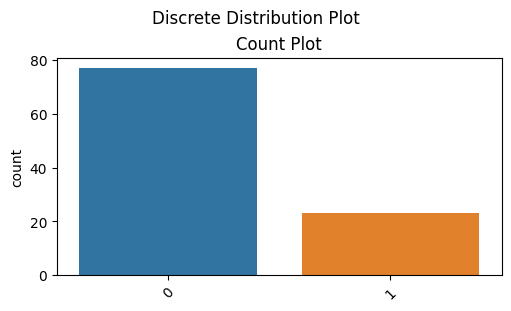

In [6]:
bernoulli_dist = bernoulli_distribution(p=0.30,size=100)

discrete_non_viz_analysis(data=bernoulli_dist)

discrete_viz_analysis(data=bernoulli_dist)

count       10000
nunique         2
unique     [0, 1]
dtype: object
Value Counts: 
 0    6985
1    3015
Name: count, dtype: int64



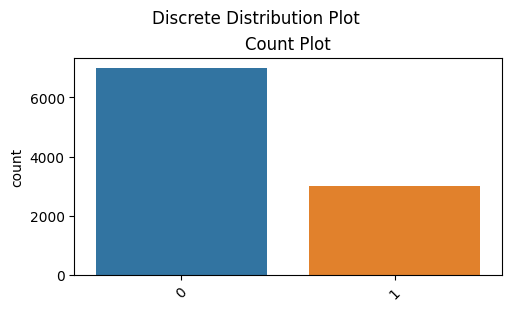

F(k=0): 0.7000000000000002
F(k=1): 0.3


In [8]:
# Using scipy.stats to generate the bernoulli distribution
prob_success = 0.30

var = stats.bernoulli.rvs(p=prob_success, size=10000)
discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

# calculating pmf
print('F(k=0):', stats.bernoulli.pmf(k=0, p=prob_success))
print('F(k=1):', stats.bernoulli.pmf(k=1, p=prob_success))

### Binomial Distribution

The binomial distribution models the number of successes (x) in a fixed number of independent Bernoulli trials (n), each with the same probability of success (p). For eg:

1. Number of Loan Approvals in a day - Assuming the bank receives 20 loan applications in a day (i.e. n), and each application has an independent probability of approval of p = 0.8.
What is the probability of approving exactly 15 loans?
Ans: _________

2. Success Rate in a Tutoring Program - In a tutoring program, 50 students (i.e. n) are enrolled, and each student has an independent probability of success (p=0.7).
What is the probability of exactly 30 students succeeding?
Ans: __________

If data follows binomial distribution, we represent it like this:
 $\X~B(n,p)

Probability Mass Function
 f(x)=(n,x)(p)^x(1-p)^n-x
 (n,x)= n!/x!(n-x)!

here,
 


In [11]:
def binomial_distribution(n,p,size):
    # Define the number of trials (n) and the probability of success (p)
    return np.random.binomial(n=n, p=p, size=size)

count                            10000
nunique                              9
unique     [3, 4, 1, 2, 5, 0, 8, 6, 7]
dtype: object
Value Counts: 
 3    2656
2    2422
4    1920
1    1205
5    1046
6     383
0     267
7      85
8      16
Name: count, dtype: int64



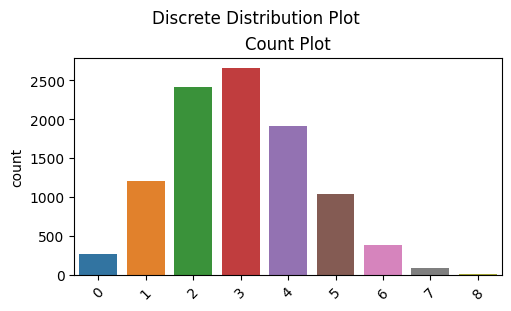

In [12]:
binomial_dist = binomial_distribution(n=10, p=0.30, size=10000)
discrete_non_viz_analysis(data=binomial_dist)
discrete_viz_analysis(data=binomial_dist)

count                               10000
nunique                                10
unique     [4, 5, 1, 2, 3, 0, 6, 8, 7, 9]
dtype: object
Value Counts: 
 3    2671
2    2333
4    2040
1    1214
5    1006
6     338
0     292
7      93
8      12
9       1
Name: count, dtype: int64



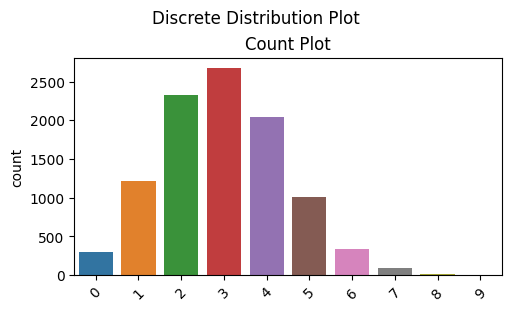

probability of 0 success out of 10 trials: 0.0282475249
Probability of 1 success out of 10 trials: 0.12106082099999989
Probability of 2 successes out of 10 trials: 0.2334744405000001
Probability of <=2 success out of 10 trials: 0.3827827863999998


In [15]:
# using scipy.stats to generate the binomial distribution
n_trials = 10
prob_success = 0.30
var = stats.binom.rvs(n=n_trials, p=prob_success, size=10000)
discrete_non_viz_analysis(data=var)
discrete_viz_analysis(data=var)

# computing pmf and cdf
print('probability of 0 success out of 10 trials:', stats.binom.pmf(k=0, n=n_trials, p=prob_success))
print("Probability of 1 success out of 10 trials:", stats.binom.pmf(k=1, n=n_trials, p=prob_success))
print("Probability of 2 successes out of 10 trials:", stats.binom.pmf(k=2, n=n_trials, p=prob_success))
print("Probability of <=2 success out of 10 trials:", stats.binom.cdf(k=2, n=n_trials, p=prob_success))

### Poisson Distribution

The Poisson distribution models the number of events that occur in a fixed interval of time or space, assuming events occur at a constant average rate (λ) and are independent of the time since the last event. For eg:

1. Customer Arrivals at a Bank Branch every hour - Suppose, on average, a bank branch receives 30 customers per hour. Here λ=30 (i.e. Average number of customers arriving per hour)
What is the probability of 40 (i.e. x) customers arriving in the next hour?
Ans: _________

2. Students Arrival at a Library everyday - Suppose, on average, a university library receives 500 students per day. Here λ=500 (i.e. Average number of students arriving per day)
What is the probability of 600 students (i.e. x) arriving in a specific day?
Ans: _________

If data follows poisson distribution, we represent it like this:
$x~P(λ)
Probability Mass Function
 
 

Typically, Poisson Distribution has following characteristics:

It should exhibit a right-skewed, unimodal shape.
Variance is approximately equal to the mean.

In [7]:
def poisson_distribution(lam,size):
    # Define expected number of events occurring in a fixed-time interval (lam)
    return np.random.poisson(lam=lam, size=size)

In [9]:
poisson_dist = poisson_distribution(lam=30, size=10000)
discrete_non_viz_analysis(data=poisson_dist)

count                                                  10000
nunique                                                   43
unique     [31, 25, 24, 30, 39, 23, 40, 33, 22, 28, 38, 3...
dtype: object
Value Counts: 
 31    725
30    715
29    713
28    690
32    670
27    633
33    597
26    595
34    517
25    502
35    424
24    422
36    354
23    350
37    311
22    297
38    265
21    196
39    193
40    168
20    135
41    101
19     77
42     73
43     53
18     51
44     40
17     37
45     24
47     14
46     13
16      7
49      6
15      6
50      6
14      5
48      5
13      4
51      2
53      1
11      1
58      1
12      1
Name: count, dtype: int64



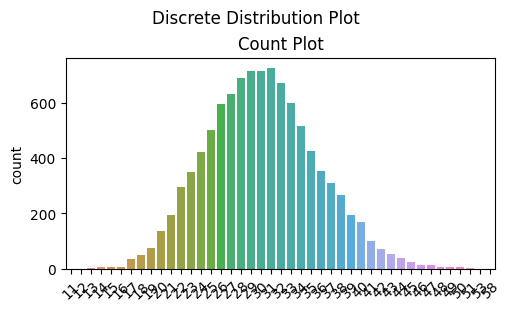

In [11]:
discrete_viz_analysis(data=poisson_dist)

In [13]:
continuous_non_viz_analysis(poisson_dist)

count     10000.00
min          11.00
max          58.00
mean         30.07
median       30.00
var          30.64
std           5.54
skew          0.24
kurt          0.08
dtype: float64



In [14]:
# Using scipy.stats to generate the poisson distribution
lambda_=30
var = stats.poisson.rvs(mu=lambda_, size=10000)
discrete_non_viz_analysis(data=var)


count                                                  10000
nunique                                                   41
unique     [27, 30, 28, 25, 26, 29, 24, 19, 33, 32, 46, 3...
dtype: object
Value Counts: 
 31    730
29    722
30    704
28    702
27    658
32    652
26    628
33    590
34    518
25    506
35    436
24    415
36    362
23    345
37    302
22    253
38    248
21    224
39    188
40    151
20    126
41    110
19     99
42     67
18     50
43     50
44     37
17     34
45     29
46     15
16     13
15     10
48      9
14      4
50      3
49      3
47      2
13      2
8       1
52      1
51      1
Name: count, dtype: int64



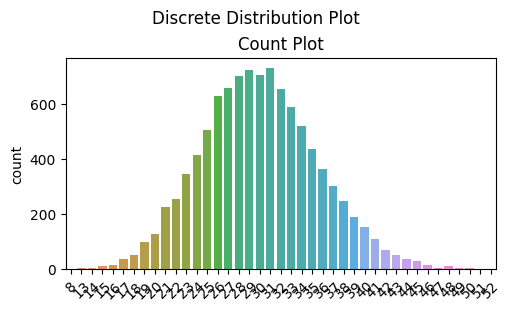

Probability of 20 events happening, given that on an average 30 events happen: 0.013411150012837837
Probability of 25 events happening, given that on an average 30 events happen: 0.05111533742894147
Probability of 35 events happening, given that on an average 30 events happen: 0.045308200086552224
Probability of <= 35 events happening, given that on an average 30 events happen:: 0.8426165255696685


In [15]:
discrete_viz_analysis(data=var)
# computing pmf and cdf
print("Probability of 20 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=20, mu=lambda_))

print("Probability of 25 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=25, mu=lambda_))

print("Probability of 35 events happening, given that on an average 30 events happen:", stats.poisson.pmf(k=35, mu=lambda_))

print("Probability of <= 35 events happening, given that on an average 30 events happen::", stats.poisson.cdf(k=35, mu=lambda_))

### Multinomial Distribution

If you have a discrete column in your dataset with more than two distinct values (i.e., a cardinality greater than 2), the distribution of this column would be a specific type of discrete probability distribution known as a Multinomial Distribution.

In a multinomial distribution, each observation falls into one of several categories, with each category having a specified probability. In your case, with three distinct values, you have three categories.

Conclusion
These examples illustrate how each of these distributions can be applied in different scenarios to model random processes with specific characteristics.

- The Bernoulli distribution can model binary outcomes like pass/fail
- The binomial distribution can model the number of successes in a fixed number of trials (e.g., success in a tutoring program)
- The Poisson distribution can model the occurrence of events (e.g., student arrivals at a library) over a specific time frame.

### Continuous Distribution

- Uniform Distribution
In a uniform distribution, all outcomes are equally likely within a specified range. For eg:

- Rolling a Fair Six-Sided Die - When rolling a fair six-sided die, each face has an equal probability of 1/6. This is an example of a discrete uniform distribution.
- Random Loan Assignment - In a bank, loans are often assigned to different loan officers for processing. To ensure fairness and impartiality, the bank may use a uniform distribution to randomly assign loans to officers. This process helps distribute the workload evenly among the loan officers, promoting fairness and efficiency in loan processing.
If data follows uniform distribution, we represent it like this:
 

Probability Density Function
 
 

In [16]:
def uniform_distribution(min,max,size):
    return np.random.uniform(low=min, high=max, size=size)

In [17]:
uniform_dist = uniform_distribution(min=10, max=40, size=10000)
continuous_non_viz_analysis(data=uniform_dist)

count     10000.00
min          10.00
max          40.00
mean         24.92
median       24.86
var          74.44
std           8.63
skew          0.02
kurt         -1.21
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


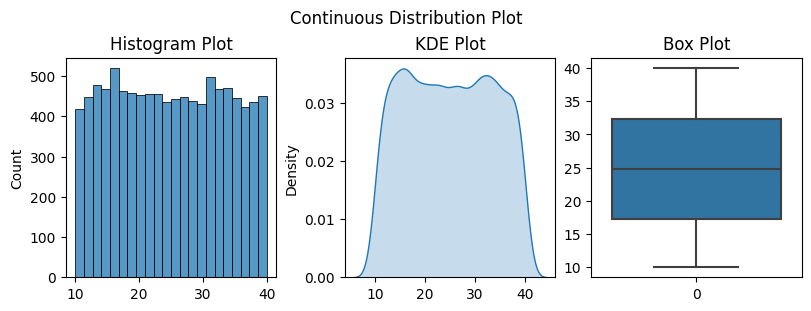

In [18]:
continuous_viz_analysis(data=uniform_dist)

count     10000.00
min          10.00
max          50.00
mean         29.93
median       29.92
var         132.70
std          11.52
skew          0.01
kurt         -1.20
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


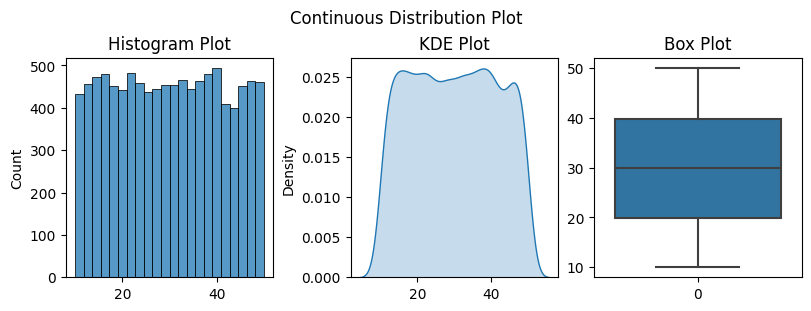

F(x=0): 0.0
F(x=20): 0.025
F(x=30): 0.025
F(x<=30): 0.5


In [19]:
# Using scipy.stats to generate the uniform distribution
min=10
max=40

var = stats.uniform.rvs(loc=min,scale=max,size=10000)
continuous_non_viz_analysis(data=var)
continuous_viz_analysis(data=var)

# computing pdf and cdf
print("F(x=0):", stats.uniform.pdf(x=0, loc=min, scale=max))

print("F(x=20):", stats.uniform.pdf(x=20, loc=min, scale=max))

print("F(x=30):", stats.uniform.pdf(x=30, loc=min, scale=max))

print("F(x<=30):", stats.uniform.cdf(x=30, loc=min, scale=max))

In [20]:
# percent point function (inverse of cdf)
stats.uniform.ppf(q=0.25, loc=min, scale=max)

20.0

## Normal Distribution and 68-95-99.7% Rule

The normal distribution is characterized by its bell-shaped curve and is widely used in various fields to model a wide range of natural phenomena. This distribution can be described by its mean and standard deviation, providing insights into the central tendency and spread of the data.
Important - If a data follow normal distribution, it will follow 68-95-99.7% Rule. i.e. 68% of the total data will lie in 1 std range, 95% of the total data will lie in 2 std range and 99.7% of the total data will lie in 3 std range.

For eg:

- Heights of Adult Males - In a large population of adult males, heights tend to follow a normal distribution. If we measure the heights of 1000 randomly selected adult males, we would likely observe a bell-shaped distribution centered around the average height for adult males.
- ATM Transaction Amounts - The amounts withdrawn from ATMs by customers in a bank can often be modeled using a normal distribution. While some customers withdraw small amounts, there will be a central tendency around an average withdrawal amount. The bank can use this distribution to analyze the distribution of withdrawal amounts, helping them manage cash reserves and plan ATM refills effectively.
If data follows Normal Distribution, we represent it like this:
 

Probability Density Function
 
 
 


In [20]:
def normal_distribution(mean,std,size):
    return np.random.normal(loc=mean, scale=std,size=size)

count     10000.00
min        -123.48
max         180.29
mean         10.25
median       10.20
var        1611.78
std          40.15
skew          0.01
kurt         -0.06
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


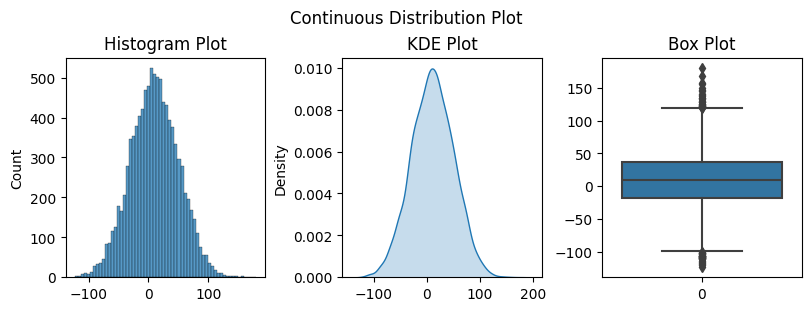

In [21]:
normal_dist = normal_distribution(mean=10, std=40, size=10000)
continuous_non_viz_analysis(data=normal_dist)
continuous_viz_analysis(data=normal_dist)

count     10000.00
min        -145.68
max         201.49
mean         10.03
median       10.81
var        1618.70
std          40.23
skew         -0.05
kurt          0.03
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


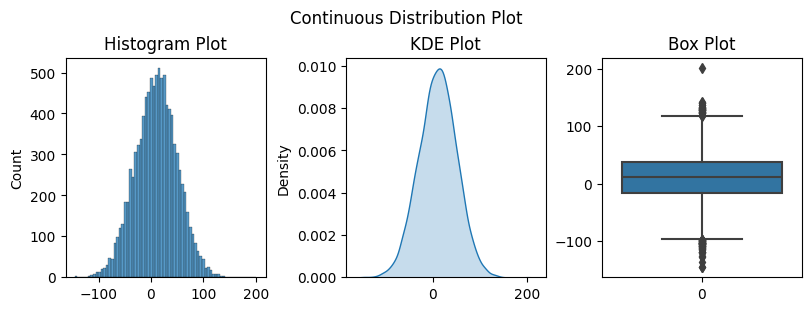

F(x=0): 0.009666702920071232
F(x=20): 0.009666702920071232
F(x=30): 0.008801633169107488
F(x<=10): 0.5


In [9]:
# Using scipy.stats to generate the normal distribution
mean=10
std =40
var = stats.norm.rvs(loc=mean, scale=std, size=10000)
continuous_non_viz_analysis(data=var)
continuous_viz_analysis(data=var)

# Computing PDF and CDF

print("F(x=0):", stats.norm.pdf(x=0, loc=mean, scale=std))

print("F(x=20):", stats.norm.pdf(x=20, loc=mean, scale=std))

print("F(x=30):", stats.norm.pdf(x=30, loc=mean, scale=std))

print("F(x<=10):", stats.norm.cdf(x=10, loc=mean, scale=std))

In [10]:
# # Answer this?
a = stats.norm.cdf(x=-30, loc=mean, scale=std)
b = stats.norm.cdf(x=50, loc=mean, scale=std)

print("Answer:", b-a)

Answer: 0.6826894921370859


In [ ]:
# Percent point function (inverse of cdf)

stats.norm.ppf(q=0.5, loc=min, scale=max)

68 - 95 - 99.7 Rule

/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


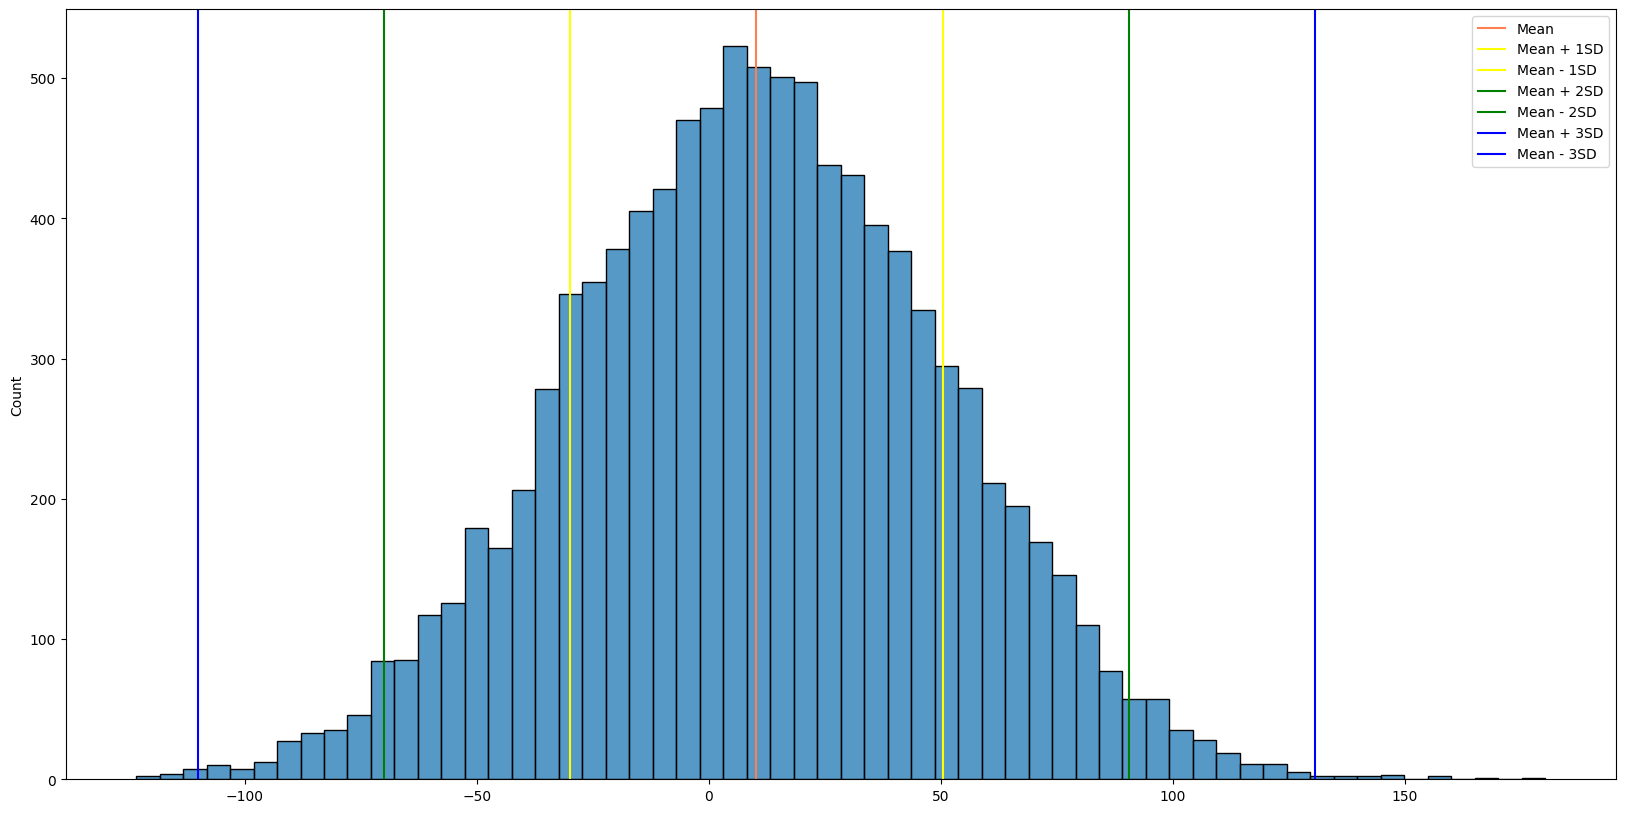

In [22]:
plt.figure(figsize=(20,10))
sns.histplot(normal_dist)
plt.axvline(normal_dist.mean(), color='coral', label='Mean')
plt.axvline(normal_dist.mean() + (1 * normal_dist.std()), color='yellow', label='Mean + 1SD')
plt.axvline(normal_dist.mean() - (1 * normal_dist.std()), color='yellow', label='Mean - 1SD')
plt.axvline(normal_dist.mean() + (2 * normal_dist.std()), color='green', label='Mean + 2SD')
plt.axvline(normal_dist.mean() - (2 * normal_dist.std()), color='green', label='Mean - 2SD')
plt.axvline(normal_dist.mean() + (3 * normal_dist.std()), color='blue', label='Mean + 3SD')
plt.axvline(normal_dist.mean() - (3 * normal_dist.std()), color='blue', label='Mean - 3SD')

plt.legend()

plt.show()


In [23]:
normal_dist< normal_dist.mean() + (1* normal_dist.std())

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
(normal_dist < normal_dist.mean() + (1 * normal_dist.std())).sum()

In [25]:
def percentage_of_data(data,x):
    left = data.mean()-(x * data.std())
    right = data.mean()-(x * data.std())

    total = data.shape[0]
    portion=((data>left)&(data<right)).sum()
    print(f"Total: {total}")
    print(f"Number of data points between {left.round(2)} and {right.round(2)}: {portion}")
    print(f"Percentage of data points between {left.round(2)} and {right.round(2)}: {portion/total}")
percentage_of_data(normal_dist, 1)
  

Total: 10000
Number of data points between -29.9 and -29.9: 0
Percentage of data points between -29.9 and -29.9: 0.0


In [26]:
percentage_of_data(normal_dist, 2)

Total: 10000
Number of data points between -70.04 and -70.04: 0
Percentage of data points between -70.04 and -70.04: 0.0


In [27]:
percentage_of_data(normal_dist, 3)

Total: 10000
Number of data points between -110.19 and -110.19: 0
Percentage of data points between -110.19 and -110.19: 0.0


# Exponential Distribution

The exponential distribution models the time until an event occurs in a Poisson process, where events occur continuously and independently at a constant average rate (λ). For eg:

Time Between Customer Arrivals
Modeling waiting times, such as the time between phone calls at a call center.
Reliability engineering, e.g., time until failure of a component.
If data follows exponential distribution, we represent it like this:
 

Probability Density Function
 

In [28]:
def exponential_distribution(lam, size):
    # scale(beta) is inverse of lambda parameter
    return np.random.exponential(scale=1/lam, size=size)

count     10000.00
min           0.00
max           1.86
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.97
kurt          5.76
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


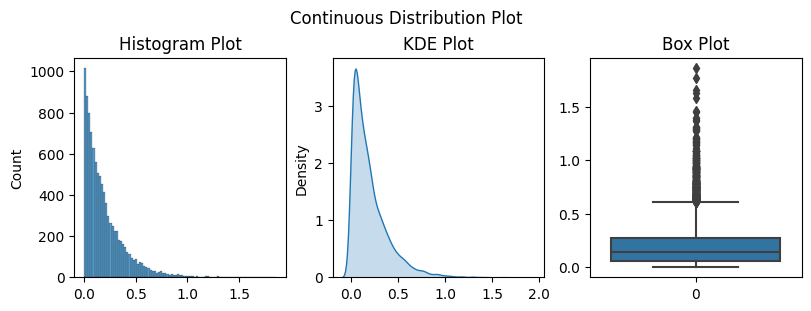

In [29]:
exponential_dist = exponential_distribution(lam=5, size=10000)
continuous_non_viz_analysis(data=exponential_dist)
continuous_viz_analysis(data=exponential_dist)

count     10000.00
min           0.00
max           1.88
mean          0.20
median        0.14
var           0.04
std           0.20
skew          1.94
kurt          5.43
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


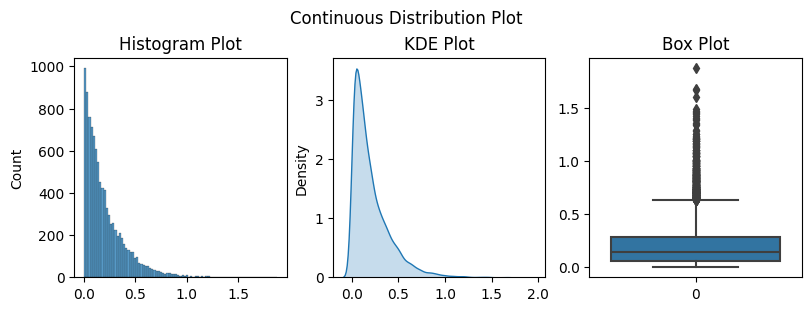

F(x=0.5): 0.410424993119494
F(x=0.75): 0.11758872928004553
F(x=0.90): 0.055544982691211525
F(x<=1): 0.9932620530009145


In [30]:
# Using scipy.stats to generate the normal distribution
lambda_=5
var = stats.expon.rvs(scale=1/lambda_, size=10000)
continuous_non_viz_analysis(data=var)
continuous_viz_analysis(data=var)

# Computing PDF and CDF

print("F(x=0.5):", stats.expon.pdf(x=0.5, scale=1/lambda_))

print("F(x=0.75):", stats.expon.pdf(x=0.75, scale=1/lambda_))

print("F(x=0.90):", stats.expon.pdf(x=0.90, scale=1/lambda_))

print("F(x<=1):", stats.expon.cdf(x=1, scale=1/lambda_))

In [31]:
# Percent point function (inverse of cdf)

stats.expon.ppf(q=0.994, scale=1/lambda_)

1.0231991619508163

### Log Normal Distribution

It is right-skewed and typically used for variables that are positive and have a long right tail. The log-normal distribution describes a random variable whose logarithm is normally distributed.

Applications:

Modeling variables like income, asset prices, and biological measurements that cannot be negative.
In finance, modeling stock prices.

In [32]:
def lognormal_distribution(mean, std, size):
    return np.random.lognormal(mean=mean, sigma=std, size=size)

count     10000.00
min           0.00
max        1054.07
mean          6.33
median        1.00
var         765.93
std          27.68
skew         20.49
kurt        600.00
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


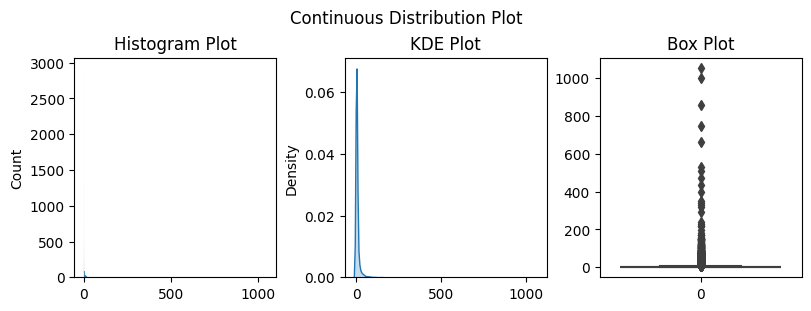

In [33]:
lognormal_dist = lognormal_distribution(mean=0, std=2, size=10000)
continuous_non_viz_analysis(lognormal_dist)
continuous_viz_analysis(lognormal_dist)

The way location, scale, and shape parameters work in SciPy for the Log-Normal distribution is confusing.

Suppose a normally distributed random variable X has mean mu and standard deviation sigma. Then Y = exp(X) is lognormally distributed with s = sigma and scale = exp(mu).

count     1000.00
min          0.00
max        370.17
mean         6.84
median       1.04
var        465.67
std         21.58
skew         8.84
kurt       109.72
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


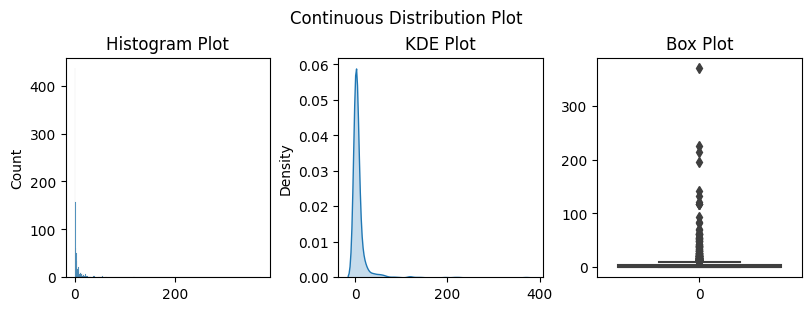

F(x=0.5): 0.3756884160167712
F(x=0.75): 0.2632242987893306
F(x=2): 0.09392210400419279
F(x<=2): 0.6355441552634643


In [36]:
# using scipy.stats to generate the normal distribution
mean=0
std=2

var = stats.lognorm.rvs(s=std, scale=np.exp(mean),size=1000)
continuous_non_viz_analysis(data=var)
continuous_viz_analysis(data=var)

# Computing PDF and CDF

print("F(x=0.5):", stats.lognorm.pdf(x=0.5, s=std, scale=np.exp(mean)))

print("F(x=0.75):", stats.lognorm.pdf(x=0.75, s=std, scale=np.exp(mean)))

print("F(x=2):", stats.lognorm.pdf(x=2, s=std, scale=np.exp(mean)))

print("F(x<=2):", stats.lognorm.cdf(x=2, s=std, scale=np.exp(mean)))

In [37]:
stats.lognorm.ppf(q=0.636, s=std, scale=np.exp(mean))

2.004860352199883

Pareto Distribution (Power Law) - 80:20 Distribution
The power-law distribution, also known as a Pareto distribution, is characterized by a long tail of rare events. It's a heavy-tailed distribution. It describes phenomena where large events are rare but have a substantial impact. It is also known as the “80-20 rule”.

Applications:

Modeling city sizes, where a few cities have a very large population while most have relatively few inhabitants.
In social sciences, representing the distribution of income or wealth.

In [5]:
def pareto_distribution(alpha,size):
    return np.random.pareto(a=alpha, size=size)

count     10000.00
min           0.00
max          85.92
mean          0.99
median        0.42
var           6.65
std           2.58
skew         16.02
kurt        392.45
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


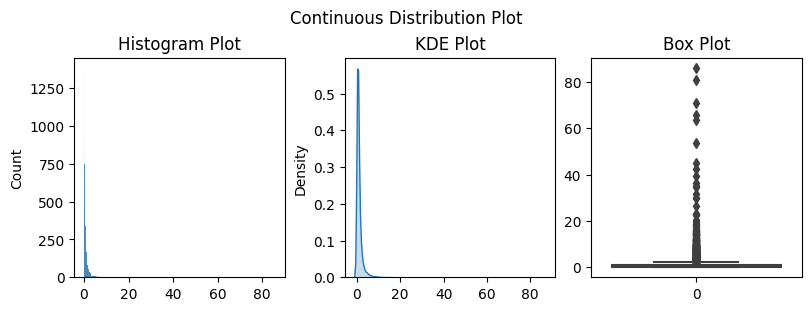

In [6]:
pareto_dist = pareto_distribution(alpha=2, size=10000)
continuous_non_viz_analysis(data=pareto_dist)
continuous_viz_analysis(data=pareto_dist)

count     10000.00
min           1.00
max         317.92
mean          2.10
median        1.42
var          32.43
std           5.69
skew         40.82
kurt       2012.13
dtype: float64



/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/idreesy31/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


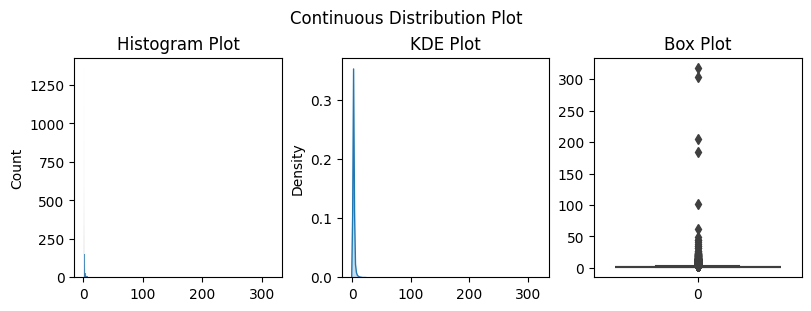

F(x=0.5): 0.0
F(x=0.75): 0.0
F(x=2): 0.25
F(x<=2): 0.75


In [8]:
# using scipy.stats to generate the normal distribution
alpha=2
var = stats.pareto.rvs(b=alpha, size=10000)
continuous_non_viz_analysis(data=var)
continuous_viz_analysis(data=var)

# Computing PDF and CDF

print("F(x=0.5):", stats.pareto.pdf(x=0.5, b=alpha))

print("F(x=0.75):", stats.pareto.pdf(x=0.75, b=alpha))

print("F(x=2):", stats.pareto.pdf(x=2, b=alpha))

print("F(x<=2):", stats.pareto.cdf(x=2, b=alpha))

Conclusion
These examples demonstrate how these distributions can be applied in the banking domain. The uniform distribution can model equally likely outcomes, the exponential distribution can represent continuous processes like response times, and the normal distribution can describe data with a central tendency, like transaction amounts.

#### Case Study

- Scenario: Setting Up a Garment Store

Your friend is embarking on the journey of setting up a garment store. Launching a new business with limited funds demands meticulous planning, resourcefulness, and a sharp understanding of the market. For the initial phase, your friend has decided to focus solely on one product - Jeans, and is investing 100,000 INR in inventory.

Question: How should the available budget be allocated for inventory?
Answer: Determining the optimal budget allocation can be a bit challenging without a thorough market analysis. A preliminary suggestion might be to allocate 50,000 INR for both male and female customers.

However, what if there's a scarcity of male customers? 😱

Fortunately, your friend has you, a trusted best friend who also happens to be a successful Data Scientist. Budget allocation can rely on many factors like:

Gender Split:

Since your friend is offering jeans, it's essential to consider the gender split in potential customers. This will help in determining how to allocate the budget effectively.

Sizing Considerations:

Different body types and sizes should be taken into account. It might be beneficial to allocate a portion of the budget for a diverse range of sizes.

Turns out that you have collected some data. Check it out below:

Import the libraries and load the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('height_gender_data.csv')
df.head()

,Unnamed: 0,height,gender
0,0,142.905550,Male
1,1,115.598717,Male
2,2,138.027187,Female
3,3,130.939245,Male
4,4,125.079458,Female


In [ ]:
df.drop(['Unnamed: 0'],axis=1,  inplace=True)

In [9]:
df.head()

,height,gender
0,142.905550,Male
1,115.598717,Male
2,138.027187,Female
3,130.939245,Male
4,125.079458,Female


Domain Knowledge

Let's assume you with the help of an expert got the following information about jeans size and height ranges for both the genders. Consider the following chart for better Budget Allocation.

In [11]:
info = {
    'Group':['Female Heights', 'Male Heights'],
    'Small':[[120, 136.61],[99.87, 129.87]],
    'Medium':[[136.61, 153.41],[129.97, 160.07]],
    'Large': [[154.41, 170],[160.07, 190.17]]
}

In [12]:
pd.DataFrame(info)

,Group,Small,Medium,Large
0,Female Heights,"[120, 136.61]","[136.61, 153.41]","[154.41, 170]"
1,Male Heights,"[99.87, 129.87]","[129.97, 160.07]","[160.07, 190.17]"


Task to Solve
Give a proper budget allocation to your friend based on your data analysis skills.

Understand that:

- Data can be represented in a table with n rows and m columns.
- Rows - Also known as entities or datapoints.
- Columns - Also known as features, properties or attributes
- Each column represents data distribution of a feature (important to understand).
- These data distribution can be discrete (for categorical and discrete numerical columns) or continuous (for real numerical columns).
- We can study data distributions by performing univariate non-visual or visual analysis.
- Non Visual Analysis helps us understand key statistical characteristics of data distributions like count, mean, median, skew, kurtosis, etc...
- Types of data distribution (i.e. Bernoulli, Binomial, Normal, Exponential, etc...) can be identified by understanding the key characteristics of data distribution.

Verify the Type of Distribution - QQ Plot
Reference: https://docs.scipy.org/doc/scipy/reference/stats.html

Use the above reference to identify the dist parameter.

In [ ]:
stats.probplot(normal_dist, dist=stats.norm, plot=plt)
plt.title('Verifying Distribution Type - Normal')
plt.grid()